In [4]:
import scipy as sp
import numpy as np
import numpy.linalg as la
from scipy.integrate import odeint
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def resposta_tempo(x, t, w):

    C=sp.array([[c11/m,0,c12/m,0],[0,c11/m,0,c12/m],[c21/I,0,c22/I,0],[0,c21/I,0,c22/I]])
    G=sp.array([[0,0,0,0],[0,0,0,0],[0,0,0,Ip/I*w],[0,0,-Ip/I*w,0]])
    K=sp.array([[alpha/m,0,gama/m,0],[0,alpha/m,0,gama/m],[gama/I,0,delta/I,0],[0,gama/I,0,delta/I]])
    f=[0,0,0,0,u*w**2*sp.cos(w*t),u*w**2*sp.sin(w*t),(Ip-I)/I*2*w**2*sp.cos(w*t),(Ip-I)/I*2*w**2*sp.sin(w*t)]
    
    a11=np.zeros((4,4))
    a12=np.eye(4)
    a1=np.hstack((a11,a12))
    a2=np.hstack((-1*K,-1*(C+G)))
    
    A=np.vstack((a1, a2))
    
    dxdt=A @ x + f
    
    return dxdt  

In [20]:
#propiedades do material (aco)
rho=7860
E=210e9

#dimensoes eixo
L=20
d=.2
A=np.pi*d**2/4

In [21]:
#vetor espaco-estado
x=0
y=0
thetax=0
thetay=0
Dx=0
Dy=0
Dthetax=0
Dthetay=0

z=[x, y, thetax, thetay, Dx, Dy, Dthetax, Dthetay]

#tempo
t0=0
tf=100
t=np.linspace(t0,tf,100*(tf-t0))

In [22]:
#parametros do sistema
m=rho*A*L
I=m*(d**2/16+L**2/12)
I0=np.pi*d**4/64
Ip=m*d**2/8
alpha=12*E*I0/L**3
gama=-6*E*I0/L**2
delta=4*E*I0/L
csi=.1
c11=2*csi*np.sqrt(alpha/m)
c12=2*csi*np.sqrt(abs(gama/m))
c21=c12
c22=2*csi*np.sqrt(delta/I)
u=1

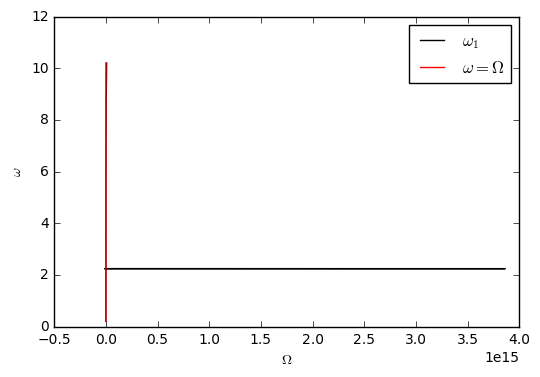

In [44]:
#Campbell

#frequencias naturais
w1=np.linspace(0.2,10.2,10000)
Omega=m*I*w1**4-(alpha*I+delta*m)*w1**2+(alpha*delta-gama**3)/(m*Ip*(w1**2-alpha/m)*w1)

#determinando as interseçoes
for i in range(len(w1)):
    if abs(w1[i] - Omega[i])<1e-1:
        print('w1 =', w1[i])
    else:
        pass

# desenhando o diagrama de Campbell
plt.plot(Omega, w1, 'k-', label='$\omega_1$')
#plt.plot(Omega, w3, 'b-', label='$\omega_3$')
plt.plot(w1, w1,'r-', label='$\omega=\Omega$')
plt.xlabel('$\Omega$')
plt.ylabel('$\omega$')
plt.legend()

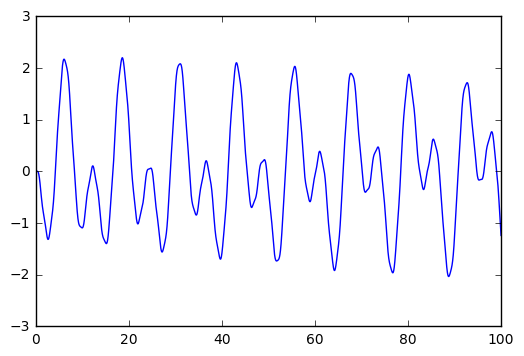

In [9]:
#para frequencia abaixo da natural
w1=.5
sol=odeint(resposta_tempo, z, t, args=(w1,))

plt.plot(t,sol[:,0])

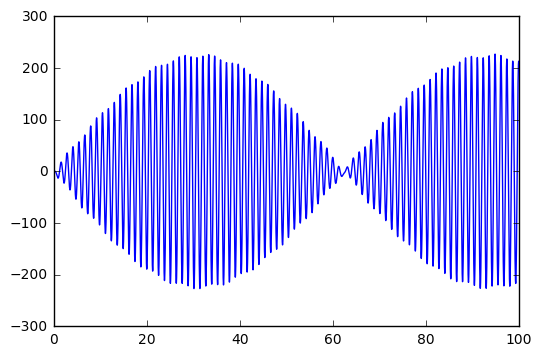

In [167]:
#para frequencia abaixo da natural
w2=5
sol=odeint(resposta_tempo, z, t, args=(w2,))

plt.plot(t,sol[:,0])